# SVM with Non-Linear RBF Kernel

### Libraries Import

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
import numpy as np

### Data Generation

In [18]:
# Running generation script
%run non_linear_data_generation.py

# Loading data from CSV
data = pd.read_csv('data_non_linear.csv')

# Extracting features and labels
X = data[['x1', 'x2']].values
y = data['label'].values

Success: data_non_linear.csv generated.


### Raw Data Visualization

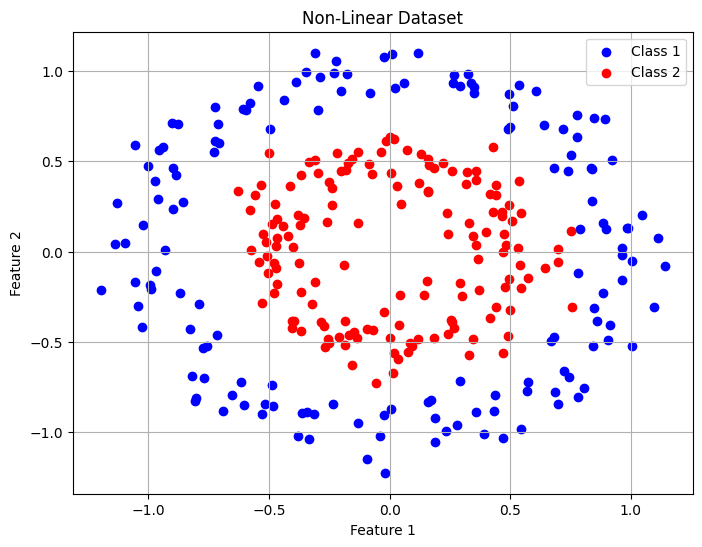

In [19]:
# Visualizing the raw data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="blue", label="Class 1")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="red", label="Class 2")
plt.title("Non-Linear Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

### Kernel Implementation

In [20]:
def rbf_kernel(X1, X2, gamma):
    # Calculating squared Euclidean distances    
    sq_norm_X1 = np.sum(X1**2, axis=1).reshape(-1, 1)
    sq_norm_X2 = np.sum(X2**2, axis=1).reshape(1, -1)
    dot_product = np.dot(X1, X2.T)
    
    # Distance matrix
    sq_distances = sq_norm_X1 + sq_norm_X2 - 2 * dot_product
    
    # Applying the RBF formula
    return np.exp(-gamma * sq_distances)

# Kernel Configuration
C_param = 1.0
gamma = 1.0

### Kernel Visualization

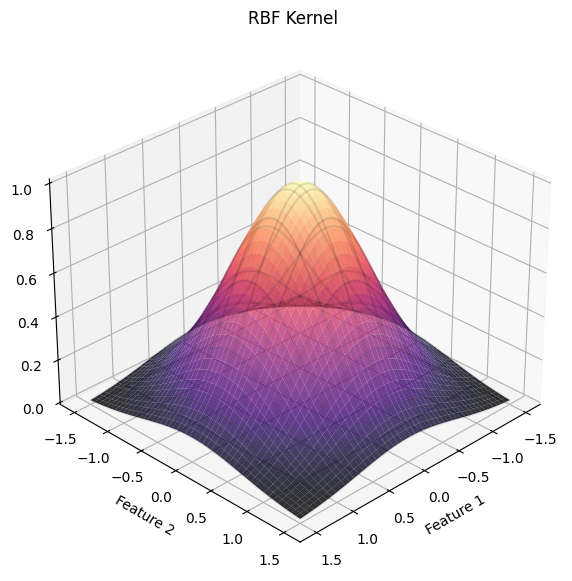

In [21]:
# Defining grid center
grid_range = 1.5
x_k = np.linspace(-grid_range, grid_range, 50)
y_k = np.linspace(-grid_range, grid_range, 50)
xx_k, yy_k = np.meshgrid(x_k, y_k)

grid_points_k = np.c_[xx_k.ravel(), yy_k.ravel()]
center_point = np.array([[0, 0]])

# Computing kernel values
z_k = rbf_kernel(grid_points_k, center_point, gamma)
z_k = z_k.reshape(xx_k.shape)

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xx_k, yy_k, z_k, cmap=plt.cm.magma, 
                       alpha=0.8, edgecolor='none', antialiased=True)

ax.plot_wireframe(xx_k, yy_k, z_k, color='black', alpha=0.1, rstride=5, cstride=5)

ax.set_title("RBF Kernel")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.view_init(elev=30, azim=45)

plt.show()

### Gram Matrix Computation

In [22]:
# Computing Gram Matrix
K_train = rbf_kernel(X, X, gamma)

print(f"Gram Matrix Shape: {K_train.shape}")

Gram Matrix Shape: (300, 300)


### Support Vectors Calculation

In [23]:
# Optimization via Lagrange Multipliers
clf = svm.SVC(kernel='precomputed', C=C_param)
clf.fit(K_train, y)

print("Optimization Complete.")
print(f"Support Vectors Found: {len(clf.support_)}")

Optimization Complete.
Support Vectors Found: 65


### Decision Boundary Visualization

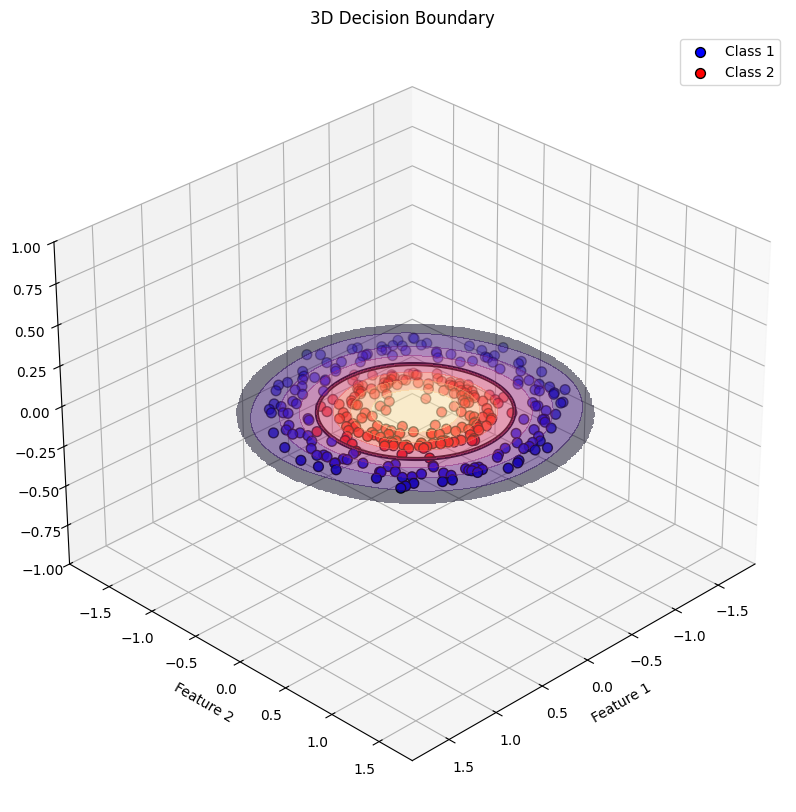

In [24]:
# Defining grid bounds
x_min_3d, x_max_3d = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min_3d, y_max_3d = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

resolution = 200 
xx_3d, yy_3d = np.meshgrid(np.linspace(x_min_3d, x_max_3d, resolution),
                           np.linspace(y_min_3d, y_max_3d, resolution))

grid_points_3d = np.c_[xx_3d.ravel(), yy_3d.ravel()]

# Computing kernel
K_grid_3d = rbf_kernel(grid_points_3d, X, gamma)

# Getting Decision Score
Z_3d = clf.decision_function(K_grid_3d)
Z_3d = Z_3d.reshape(xx_3d.shape)

R = np.sqrt(xx_3d**2 + yy_3d**2)
R_max = np.sqrt(X[:, 0]**2 + X[:, 1]**2).max() + 0.15 
mask = R > R_max

# Applying mask
Z_masked = np.copy(Z_3d)
Z_masked[mask] = np.nan 

# Plotting
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.contourf(xx_3d, yy_3d, Z_masked, zdir='z', offset=0, cmap=plt.cm.magma, alpha=0.5)
ax.contour(xx_3d, yy_3d, Z_3d, zdir='z', offset=0, levels=[0], colors='black', linewidths=3)

ax.scatter(X[y==0, 0], X[y==0, 1], np.zeros_like(X[y==0, 0]), 
           c='b', s=50, edgecolors='k', label="Class 1")
ax.scatter(X[y==1, 0], X[y==1, 1], np.zeros_like(X[y==1, 1]), 
           c='r', s=50, edgecolors='k', label="Class 2")

ax.set_title("3D Decision Boundary")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlim(-1, 1)
ax.view_init(elev=30, azim=45) 

plt.legend()
plt.show()